Before you turn this assignment in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). Lastly, hit **Validate**.

If you worked locally, and then uploaded your work to the hub, make sure to follow these steps:
- open your uploaded notebook **on the hub**
- hit the validate button right above this cell, from inside the notebook

These  steps should solve any issue related to submitting the notebook on the hub.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Cormac Dunn"
COLLABORATORS = "Efe Toros"

---

# Homework 5: Modeling, Estimation and Gradient Descent
## Course Policies
### Collaboration Policy

Data science is a collaborative activity. While you may talk with others about the homework, we ask that you **write your solutions individually**. If you do discuss the assignments with others please **include their names** at the top of your solution.

## Due Date: 11:59pm Wednesday, March 21

## Introduction
In this homework, we explore modeling data, estimating optimal parameters and a numerical estimation method, gradient descent. These concepts are some of the fundamentals of data science and machine learning and will serve as the building blocks for future projects, classes, and work.

After this homework, you should feel comfortable with the following:

1. Practice reasoning about a model

2. Build some intuition for loss functions and how the behave 

3. Work through deriving the gradient of a loss with respect to model parameters

4. Work through a basic version of gradient descent.

This homework is comprised of completing code, deriving analytic solutions, writing LaTex and visualizing loss.

In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

# Set some parameters
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 16
np.set_printoptions(4)

In [3]:
# We will use plot_3d helper function to help us visualize gradient
from hw5_utils import plot_3d

## Load Data
Load the data.csv file into a pandas dataframe.  
Note that we are reading the data directly from the URL address.

In [4]:
# Run this cell to load our sample data
data = pd.read_csv("http://www.ds100.org/sp18/assets/datasets/hw5_data.csv", index_col=0)
data.head()

,x,y
0,-5.000000,-7.672309
1,-4.966555,-7.779735
2,-4.933110,-7.995938
3,-4.899666,-8.197059
4,-4.866221,-8.183883


---
## 1. A Simple Model
Let's start by examining our data and creating a simple model that can represent this data.

### Question 1a
First, let's visualize the data in a scatter plot. After implementing the `scatter` function below, you should see something like this:
![scatter](scatter.png)


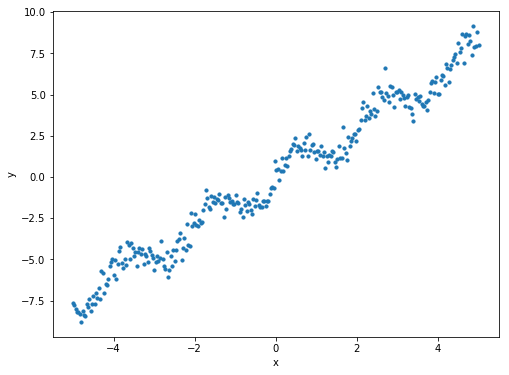

In [5]:
def scatter(x, y):
    """
    Generate a scatter plot using x and y

    Keyword arguments:
    x -- the vector of values x
    y -- the vector of values y
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(x,y,10)
    plt.xlabel('x')
    plt.ylabel('y')

x = data['x']
y = data['y']
scatter(x,y)

### Question 1b
Describe any significant observations about the distribution of the data. How can you describe the relationship between $x$ and $y$?

I observe an overall linear relationship that will most likely see a linear line of best fit. 

### Question 1c
The data looks roughly linear, with some extra noise. For now, let's assume that the data follows some linear model, parametrized by $\theta$:

$$\Large
\hat{y} = \theta \cdot x
$$

Define a linear model function that estimates a value $\hat{y}$ given $x$ and $\theta$. This model is similar to the model you defined in Lab 8.



In [6]:
def linear_model(x, theta):
    """
    Returns the estimate of y given x and theta

    Keyword arguments:
    x -- the vector of values x
    theta -- the scalar theta
    """
    y_hat = x*theta

    return y_hat

In [7]:
assert linear_model(0, 1) == 0
assert linear_model(10, 10) == 100
assert np.sum(linear_model(np.array([3, 5]), 3)) == 24
assert linear_model(np.array([7, 8]), 4).mean() == 30

### Question 1d
In class, we learned that the $L^2$ (or squared) loss function is smooth and continuous. Let's use $L^2$ loss to evaluate our estimate on $\theta$ and predict an optimal value for $\theta$, named $\theta^*$. Define the $L^2$ loss function `l2_loss` below.

In [8]:
def l2_loss(y, y_hat):
    """
    Returns the average l2 loss given y and y_hat

    Keyword arguments:
    y -- the vector of true values y
    y_hat -- the vector of predicted values y_hat
    """
    ...
    return np.mean((y-y_hat)**2)

In [9]:
assert l2_loss(2, 1) == 1
assert l2_loss(2, 0) == 4 
assert l2_loss(5, 1) == 16
assert l2_loss(np.array([5, 6]), np.array([1, 1])) == 20.5
assert l2_loss(np.array([1, 1, 1]), np.array([4, 1, 4])) == 6.0

### Question 1e

First, visualize the $L^2$ loss as a function of $\theta$, where several different values of $\theta$ are given. Be sure to label your axes properly. You plot should look something like this:
![avg_l2](l2_avg_loss.png)

What looks like the optimal $\theta^*$ value based on the visualization? Set `theta_star_guess` to the value of $\theta$ that appears to minimize our loss.

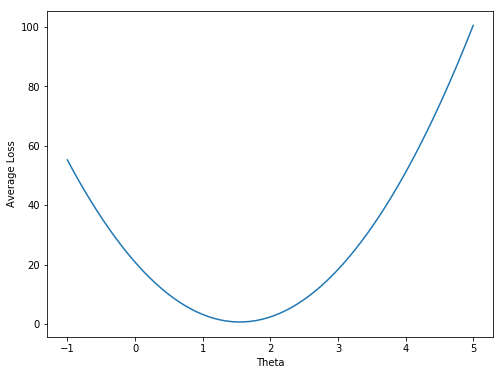

In [10]:
def visualize(x, y, thetas):
    """
    Plots the average l2 loss for given x, y as a function of theta.
    Use the functions you wrote for linear_model and l2_loss.

    Keyword arguments:
    x -- the vector of values x
    y -- the vector of values y
    thetas -- the vector containing different estimates of theta
    """
    avg_loss = [l2_loss(y, linear_model(x, theta)) for theta in thetas]
    
    plt.figure(figsize=(8,6))
    
    plt.plot(thetas, avg_loss)
    plt.xlabel('Theta')
    plt.ylabel('Average Loss')
    

thetas = np.linspace(-1, 5, 70)
visualize(x, y, thetas)

theta_star_guess = 1.5

In [11]:
assert l2_loss(3, 2) == 1
assert l2_loss(0, 10) == 100
assert 1 <= theta_star_guess <= 2

---
## 2. Fitting our Simple Model
Now that we have defined a simple linear model and loss function, let's begin working on fitting our model to the data.

### Question 2a
Let's confirm our visual findings for optimal $\theta^*$. First, find the analytical solution for the optimal $\theta^*$ for average $L^2$ loss. Write up your solution in the cell below using LaTex. Here are some useful examples of LaTex syntax:

Summation: $\sum_{i=1}^n a_i$

Exponent: $a^2$

Fraction: $\frac{a}{b}$

Multiplication: $a \cdot b$

Derivative: $\frac{\partial}{\partial a}$

Symbols: $\alpha, \beta, \theta$

The solution is:

$ \theta^* = \sum_{i=1}^n y_ix_i$/$\sum_{i=1}^n x_i^2$




### Question 2b
Now that we have the analytic solution for $\theta^*$, implement the function `find_theta` that calculates the numerical value of $\theta^*$ based on our data $x$, $y$.



In [12]:
def find_theta(x, y):
    """
    Find optimal theta given x and y

    Keyword arguments:
    x -- the vector of values x
    y -- the vector of values y
    """
    theta_opt = np.sum(x*y)/np.sum(x**2)
    return theta_opt

In [13]:
t_star = find_theta(x, y)
print(f'theta_opt = {t_star}')

assert 1.4 <= t_star <= 1.6

theta_opt = 1.5502648085962225


### Question 2c
Now, let's plot our loss function again using the `visualize` function. But this time, add a vertical line at the optimal value of theta (plot the line $x = \theta^*$). Your plot should look something like this:
![vertical_linear](vertical_linear.png)

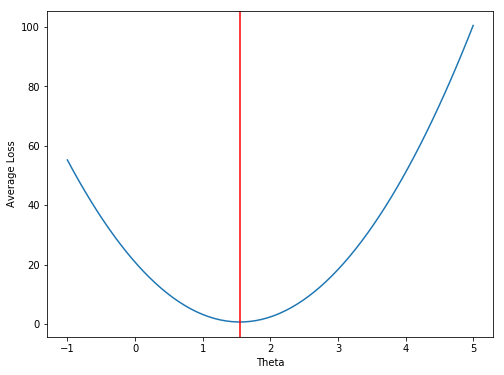

In [14]:
theta_opt = find_theta(x,y)
visualize(x,y,thetas)
plt.axvline(x = theta_opt, color='red')

### Question 2d
We now have an optimal value for $\theta$ that minimizes our loss. In the cell below, plot the scatter plot of the data from Question 1a (you can reuse the `scatter` function here). But this time, add the line $\hat{y} = \theta^* \cdot x$ using the $\theta^*$ you computed above. Your plot should look something like this:
![scatter_with_line](scatter_with_line.png)

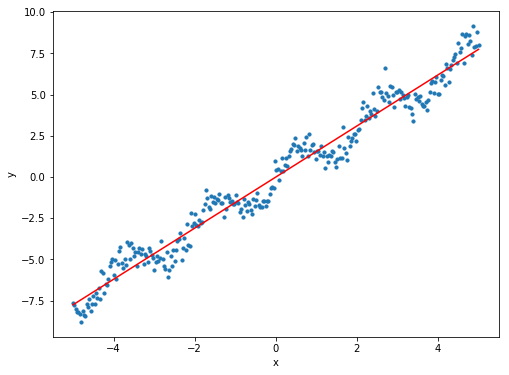

In [15]:
theta_opt = find_theta(x,y)
scatter(x,y)
plt.plot(x, x*theta_opt, color = 'red')


### Question 2e
Great! It looks like our estimate for $\theta$ is able to capture a lot of the data with a single parameter. Now let's try to remove the linear portion of our model from the data to see if we missed anything. 

The remaining data is known as the residual, $r=y-\theta^* \cdot x$. Below, write a function to find the residual and plot the residuals corresponding to x in a scatter plot. Plot a horizontal line at $y=0$ to assist visualization.

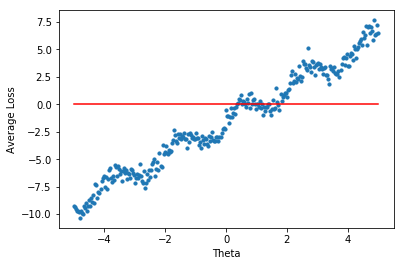

In [16]:
def visualize_residual(x, y):
    """
    Plot a scatter plot of the residuals, the remaining 
    values after removing the linear model from our data.

    Keyword arguments:
    x -- the vector of values x
    y -- the vector of values y
    """
    plt.scatter(x, y - find_theta(x,y), 10)
    plt.plot(x, x*0, color = 'red')
    plt.xlabel('Theta')
    plt.ylabel('Average Loss')
visualize_residual(x, y)

### Question 2f
What does the residual look like? Do you notice a relationship between $x$ and $r$?

I observe that the relationship appears to be the same as the one described by plt.plot(x,y). 

---
## 3. Increasing Model Complexity

It looks like the remaining data is sinusoidal, meaning our original data follows a linear function and a sinusoidal function. Let's define a new model to address this discovery and find optimal parameters to best fit the data:

$$\Large
\hat{y} = \theta_1x + sin(\theta_2x)
$$

Now, our model is parameterized by both $\theta_1$ and $\theta_2$, or composed together, $\vec{\theta}$.

Note that a generalized sine function $a\sin(bx+c)$ has three parameters: amplitude scaling parameter $a$, frequency parameter $b$ and phase shifting parameter $c$. We can assume that the scaling and shifting parameter ($a$ and $c$ in this case) are 1 and 0 respectively. 

### Question 3a
In the following cell, **explain why we can assume the scaling parameter to be 1 and shifting parameter to be 0 based on the residual plot in Question 2e**. 

You might find the following code helpful in visualizing all three parameters.

```python
def plot_sin_generalized(a,b,c,label=None):
    """Plot a sin function with three parameters"""
    X = np.linspace(-5, 5)
    Y = a * np.sin(b*X + c)
    plt.scatter(X, Y, label=label)
    plt.legend()
```

You can try plotting: 
```python
plot_sin_generalized(1,1,1, label='sin(x)')
plot_sin_generalized(1,1,2, label='sin(x + 2)')
plot_sin_generalized(1,2,2, label='sin(2x + 2)')
plot_sin_generalized(2,2,2, label='2sin(2x + 2)')
```

In [17]:
def plot_sin_generalized(a,b,c,label=None):
    """Plot a sin function with three parameters"""
    X = np.linspace(-5, 5)
    Y = a * np.sin(b*X + c)
    plt.scatter(X, Y, label=label)
    plt.legend()
    

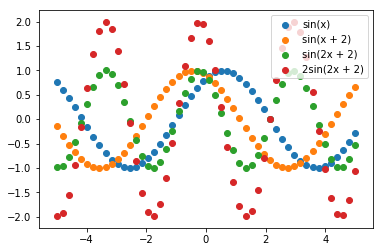

In [18]:
plot_sin_generalized(1,1,1, label='sin(x)')
plot_sin_generalized(1,1,2, label='sin(x + 2)')
plot_sin_generalized(1,2,2, label='sin(2x + 2)')
plot_sin_generalized(2,2,2, label='2sin(2x + 2)')

Shifting as visualized above does not change the statistic of the dataset. This is because all points are shifted at the same time. Scaling on the otherhand is actively changing the data and thus should be included in the model. Determined by the dummy variable with value = 1.


### Question 3b
As in Question 1, write a function that predicts a value $\hat{y}$ given an input $x$ based on our new model.

*Hint:* Try to do this without using for loops. The `np.sin` function may help you.

In [19]:
def sin_model(x, theta_1, theta_2):
    """
    Predict the estimate of y given x, theta_1, theta_2

    Keyword arguments:
    x -- the vector of values x
    theta_1 -- the scalar value theta_1
    theta_2 -- the scalar value theta_2
    """
    y_hat = theta_1*x + np.sin(theta_2*x)
    return y_hat

In [20]:
assert np.isclose(sin_model(1, 1, np.pi), 1.0000000000000002)
# Check that we accept x as arrays
assert len(sin_model(x, 2, 2)) > 1

### Question 3c
Use the average $L^2$ loss to compute $\frac{\partial L }{\partial \theta_1}, \frac{\partial L }{\partial \theta_2}$. 

First, we will use LaTex to write $L(x, y, \theta_1, \theta_2)$, $\frac{\partial L }{\partial \theta_1}$, and $\frac{\partial L }{\partial \theta_2}$ given $\vec{x}$, $\vec{y}$, $\vec{\theta}$. 

Notice that we now have $\vec{x}$ and $\vec{y}$ instead of $x$ and $y$. This means that when writing the loss function $L(x, y, \theta_1, \theta_2)$, you'll need to take the average of the squared losses for each $y_i$, $\hat{y_i}$ pair.

You don't need to write out the full derivation. Just the final expression is fine.

$
\begin{align*}
L(x, y, \theta_1, \theta_2) &= \frac{1}{n}\sum_{i=1}^n (y_i - \theta_1 x - sin(\theta_2 x)^2\\
\frac{\partial L}{\partial \theta_1} &= \frac{-2}{n}\sum_{i=1}^n x(y_i -  x - sin(\theta_2 x)\\
\frac{\partial L}{\partial \theta_2} &= \frac{-2}{n}\sum_{i=1}^n \ xcos(\theta_2 x)(y_i - \theta_1 x - sin(\theta_2 x)
\end{align*}
$




### Question 3d
Now, implement the functions `dt1` and `dt2`, which should compute $\frac{\partial L }{\partial \theta_1}$ and $\frac{\partial L }{\partial \theta_2}$ respectively. Use the formulas you wrote for $\frac{\partial L }{\partial \theta_1}$ and $\frac{\partial L }{\partial \theta_2}$ in the previous exercise. In the functions below, the parameter `theta` is a vector that looks like $( \theta_1, \theta_2 )$.

In [21]:
def dt1(x, y, theta):
    """
    Compute the numerical value of the partial of l2 loss with respect to theta_1

    Keyword arguments:
    x -- the vector of all x values
    y -- the vector of all y values
    theta -- the vector of values theta
    """
    return np.mean(-2*x*(y- (theta[0]*x) -np.sin(theta[1]*x)))

In [22]:
def dt2(x, y, theta):
    """
    Compute the numerical value of the partial of l2 loss with respect to theta_2

    Keyword arguments:
    x -- the vector of all x values
    y -- the vector of all y values
    theta -- the vector of values theta
    """
    return np.mean(-2*x* np.cos(theta[1]*x)*(y-theta[0]*x - np.sin(theta[1]*x)))

In [23]:
# This function calls dt1 and dt2 and returns the gradient dt. It is already implemented for you.
def dt(x, y, theta):
    """
    Returns the gradient of l2 loss with respect to vector theta

    Keyword arguments:
    x -- the vector of values x
    y -- the vector of values y
    theta -- the vector of values theta
    """
    return np.vstack([
        dt1(x, y, theta),
        dt2(x, y, theta)
    ])

In [24]:
assert np.isclose(dt1(x, y, [0, np.pi]), -25.376660670924529)
assert np.isclose(dt2(x, y, [0, np.pi]), 1.9427210155296564)

---
## 4. Gradient Descent
Now try to solve for the optimal $\theta^*$ analytically...

**Just kidding!**

You can try but we don't recommend it. When finding an analytic solution becomes difficult or impossible, we resort to alternative optimization methods for finding an approximate solution.

So let's try implementing a numerical optimization method: gradient descent!

### Question 4a
Implement the `grad_desc` function that performs gradient descent for a finite number of iterations. This function takes in array $x$, array $y$, and an initial value for $\theta$ (`theta`). `alpha` will be the learning rate (or step size, whichever term you prefer). In this part, we'll use a static learning rate that is the same at every time step. 

At each time step, use the gradient and `alpha` to update your current `theta`. Also at each time step, be sure to save the current `theta` in `theta_history`, along with the $L^2$ loss (computed with the current `theta`) in `loss_history`.

Hints:
- Write out the gradient update equation (1 step). What variables will you need for each gradient update? Of these variables, which ones do you already have, and which ones will you need to recompute at each time step?
- You may need a loop here to update `theta` several times.

In [25]:
# Run me
def init_t():
    """Creates an initial theta [0, 0] as a starting point for gradient descent"""
    return np.zeros((2,1))

In [26]:
def grad_desc(x, y, theta, num_iter=20, alpha=0.1):
    """
    Run gradient descent update for a finite number of iterations and static learning rate

    Keyword arguments:
    x -- the vector of values x
    y -- the vector of values y
    theta -- the vector of values theta to use at first iteration
    num_iter -- the max number of iterations
    alpha -- the learning rate (also called the step size)
    
    Return:
    theta -- the optimal value of theta after num_iter of gradient descent
    theta_history -- the series of theta values over each iteration of gradient descent
    loss_history -- the series of loss values over each iteration of gradient descent
    """
    theta_history = []
    loss_history = []
    
    i = 0
    while i < num_iter:
        yhat = sin_model(x, theta[0], theta[1])
        gradient = dt(x, y, theta)
        loss_history.append(l2_loss(y, yhat))
        theta_history.append(theta)
        theta = theta - alpha * gradient
        i +=1
        
        
        
    
    return theta, theta_history, loss_history

In [27]:
t = init_t()
t_est, ts, loss = grad_desc(x, y, t, num_iter=20, alpha=0.1)

assert len(ts) == len(loss) == 20 # theta history and loss history are 20 items in them
assert ts[0].shape == (2,1) # theta history contains theta values
assert np.isscalar(loss[0]) # loss history is a list of scalar values, not vector

assert loss[1] - loss[-1] > 0 # loss is decreasing

assert np.allclose(np.sum(t_est), 4.5, atol=2e-1)  # theta_est should be close to our value

### Question 4b
Now, let's try using a decaying learning rate. Implement `grad_desc_decay` below, which performs gradient descent with a learning rate that decreases slightly with each time step. You should be able to copy most of your work from the previous part, but you'll need to tweak how you update `theta` at each time step.

By decaying learning rate, we mean instead of just a number $\alpha$, the learning should be now $\frac{\alpha}{i+1}$ where $i$ is the current number of iteration. (Why do we need to add '+ 1' in the denominator?)

In [28]:
def grad_desc_decay(x, y, theta, num_iter=20, alpha=0.1):
    """
    Run gradient descent update for a finite number of iterations and decaying learning rate

    Keyword arguments:
    x -- the vector of values x
    y -- the vector of values y
    theta -- the vector of values theta
    num_iter -- the max number of iterations
    alpha -- the learning rate
    
    Return:
    theta -- the optimal value of theta after num_iter of gradient descent
    theta_history -- the series of theta values over each iteration of gradient descent
    loss_history -- the series of loss values over each iteration of gradient descent
    """
    theta_history = []
    loss_history = []
    
    i = 0
    while i < num_iter:
        y_hat = sin_model(x, theta[0], theta[1])
        gradient = dt(x, y, theta)
        loss_history.append(l2_loss(y, y_hat))
        theta_history.append(theta)
        theta = theta - (alpha/(i+1))*gradient
        i +=1
    

    return theta, theta_history, loss_history

In [29]:
t = init_t()
t_est_decay, ts_decay, loss_decay = grad_desc_decay(x, y, t, num_iter=20, alpha=0.1)

assert len(ts_decay) == len(loss_decay) == 20 # theta history and loss history are 20 items in them
assert ts_decay[0].shape == (2,1) # theta history contains theta values
assert np.isscalar(loss[0]) # loss history should be a list of values, not vector

assert loss_decay[1] - loss_decay[-1] > 0 # loss is decreasing

assert np.allclose(np.sum(t_est_decay), 4.5, atol=2e-1)  # theta_est should be close to our value

### Question 4c
Let's visually inspect our results of running gradient descent to optimize $\theta$. Plot our x values with our model's predicted y values over the original scatter plot. Did gradient descent successfully optimize $\theta$?

In [30]:
# Run me
t = init_t()
t_est, ts, loss = grad_desc(x, y, t)

t = init_t()
t_est_decay, ts_decay, loss_decay = grad_desc_decay(x, y, t)

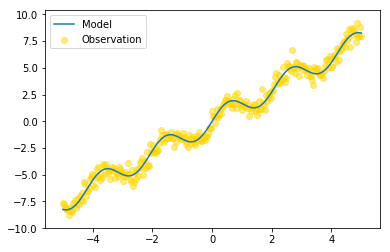

In [31]:
y_pred = sin_model(x, t_est[0], t_est[1])

plt.plot(x, y_pred, label='Model')
plt.scatter(x, y, alpha=0.5, label='Observation', color='gold')
plt.legend();

### Question 4d
Let's compare our two gradient descent methods and see how they differ. Plot the loss values over each iteration of gradient descent for both static learning rate and decaying learning rate. 

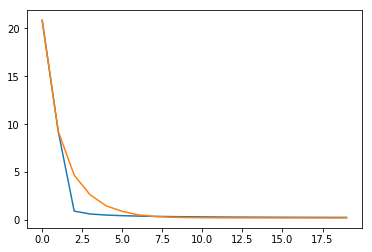

In [32]:
plt.plot(grad_desc_decay(x, y, t, num_iter=20, alpha =.1)[2])


plt.plot(grad_desc(x, y, t, num_iter = 20, alpha =.1)[2])


### Question 4e
Compare and contrast the performance of the two gradient descent methods. Which method begins to converge more quickly?

I observed that the gradient descent decay method converges much quicker when compared to the traditional static learning rate

---
## 5. Visualizing Loss

### Question 5a: 3D Plot
In the previous plot is about the loss decrease over time, but what exactly is path the theta value? Run the following three cells. 

In [33]:
# Run me
ts = np.array(ts).squeeze()
ts_decay = np.array(ts_decay).squeeze()
loss = np.array(loss)
loss_decay = np.array(loss_decay)

In [34]:
# Run me to see a 3D plot (gradient descent with static alpha)
plot_3d(ts[:, 0], ts[:, 1], loss, l2_loss, sin_model, x, y)

In [35]:
# Run me to see another 3D plot (gradient descent with decaying alpha)
plot_3d(ts_decay[:, 0], ts_decay[:, 1], loss_decay, l2_loss, sin_model, x, y)

In the following cell, write 1-2 sentences about the differences between using a static learning rate and a learning rate with decay for gradient descent. Use the loss history plot as well as the two 3D visualization to support your answer.

Static learning rate has a predicatable step size, and thus has more, smaller steps in the beginning of the gradient. When a decaying learning rate is applied, the step size is much larger. As a consequence, we see a 'sharper' and less predictable jump across the gradient. 

### Question 5b: Contour Plot

Another common way of visualizing 3D dynamics is with a _contour_ plot. 

Please refer to this notebook when you are working on the next question: http://www.ds100.org/fa17/assets/notebooks/26-lec/Logistic_Regression_Part_2.html#Visualizing-the-gradient-descent-path

In next question, fill in the necessary part to create a contour plot. Then run the following cells. 

In [36]:
## Run me
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

In [37]:
def contour_plot(title, theta_history, loss_function, model, x, y):
    """
    The function takes the following as argument:
        theta_history: a (N, 2) array of theta history
        loss: a list or array of loss value
        loss_function: for example, l2_loss
        model: for example, sin_model
        x: the original x input
        y: the original y output
    """
    theta_1_series = theta_history[:,0] # a list or array of theta_1 value
    theta_2_series = theta_history[:,1] # a list or array of theta_2 value
    
    # Create trace of theta point
    thata_points = go.Scatter(name="Theta Values", 
                              x= theta_1_series,
                              y= theta_2_series,
                              mode="lines+markers")

    ## In the following block of code, we generate the z value
    ## across a 2D grid
    t1_s = np.linspace(np.min(theta_1_series) - 0.1, np.max(theta_1_series) + 0.1)
    t2_s = np.linspace(np.min(theta_2_series) - 0.1, np.max(theta_2_series) + 0.1)

    x_s, y_s = np.meshgrid(t1_s, t2_s)
    data = np.stack([x_s.flatten(), y_s.flatten()]).T
    ls = []
    for t1, t2 in data:
        l = loss_function(model(x, t1, t2), y)
        ls.append(l)
    z = np.log(np.array(ls).reshape(50, 50))
    
    # Create the contour 
    lr_loss_contours = go.Contour(x= t1_s,
                                  y= t2_s,
                                  z= z,
                                  colorscale='Viridis', reversescale=True)
    


    plotly.offline.iplot(go.Figure(data=[lr_loss_contours, thata_points], layout={'title': title}))

In [38]:
# Run this
contour_plot('Gradient Descent with Static Learning Rate', ts, l2_loss, sin_model, x, y)

In [39]:
## Run me
contour_plot('Gradient Descent with Decay Learning Rate', ts_decay, l2_loss, sin_model, x, y)

In the following cells, write down the answer to the following questions:
- How do you interpret the two contour plots? 
- Compare contour plot and 3D plot, what are the pros and cons of each? 

The two contour plots represent an overhead view of the gradient descent. Yellow is the lowest point/minimizing point and represents the direction our function should head as alpha changes. The 3D plot is helpful for true visualization, however it is challanging to determine the 'topographic level'. This where the contour plot excels, it shows the true level of the minimization. 

## How to Improve?
It looks like our model, a combination of a linear function and sinusoidal function, was able to almost perfectly fit our data. It turns out that many real world scenarios come from relatively simple models. At the same time, the real world can be incredibly complex and a simple model wouldn't work so well. Consider the example below; it is neither linear, nor sinusoidal, nor quadratic. Suggest how we could iteratively create a model to fit this data and how we might improve our results. Try fitting the data below if you have time :-)

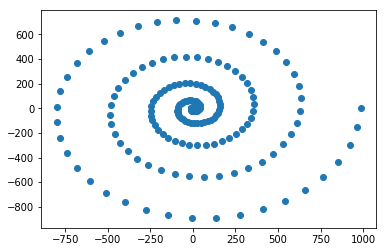

In [40]:
x = []
y = []
for t in np.linspace(0,10*np.pi, 200):
    r = ((t)**2)
    x.append(r*np.cos(t))
    y.append(r*np.sin(t))

plt.scatter(x,y)  
plt.show()

To fit this data, we could move by steps (ex: 10 x and y values) which will ensure that we still have a function (no vertical line will cross two lines). We then can model each step and eventually combine all steps to create a functional model. In this case, iteration would take a subset of the total data points and run our code over each section.


# Submission

You're done!

In order to turn in this assignment, submit this notebook to the Data 100 datahub at http://data100.datahub.berkeley.edu. 

You will need to upload this notebook and any associated files to datahub manually if you have completed this assignment on your local machine. Detailed instructions for how to submit on Datahub can be found at http://www.ds100.org/sp18/materials.

Remember to click 'Validate' for this assignment before submitting. After clicking 'Submit', you can verify there is a time-stamped submission under 'Submitted assignments'.